<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera y José Leonardo Aceves

**Fecha:** 14 de octubre del 2021.

**Expediente** : Leo: 712626 y Ana: 720567.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/leonardoaceves/ProyectoSPF_JLACEVES_AMAGUILERA

# Proyecto TEMA-2

## Proyecto Módulo 2- Guía.
> **Integrante 1:** José Leonardo Aceves González

> **Integrante 2:** Ana María Aguilera Gómez

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.

Wine and Spirits Sales in Constellation Brands

### 1.2 Objetivos.
> #### 1.1 Objetivo general:
>  - Generar pronósticos y simulaciones de ventas para aportar esquemas que ayuden a la toma de mejores desiciones.

> #### 1.2 Objetivos específicos:
>  - Encontrar la distribución de probabilidad de los cuatro nodos para obtener su correcta simulación correspondiente.

Nodos:

1. Sold-To Party State (Estado)
2. Order Quantity (Cantidad de cajas de botellas por orden)
3. Brand Name (Marca)
4. Varietal/Blend Description (Tipo de bebida)

### 1.3 Definición del problema.

Ambos miembros del equipo tenemos un empleo que involucra ventas. Ana está en el giro de vinos y licores, mientras que Leonardo en el giro de real state. Creemos que los datos que tienen mayor consistencia y alcance para este proyecto son los de Ana; ella trabaja para Constellation Brands y tiene acceso a los datos de órdenes de compra que generan los puntos de venta de poco más de 26 países. Dicha información se concentra en un documento de Excel, en cuyas columnas se especifican datos como: región, país, unidades, marcas, precios, datos de orden, fechas de envío y demás variables que afectan directa o indirectamente al margen de utilidad de la compañía.

Con los datos obtenidos, se pretende simular el volumen de venta, segmentado para cada uno de los nodos anteriores. Estos nodos se escogieron estratégicamente, ya que representan variables que influyen fuertemente en los tiempos y márgenes de venta.

### 1.4 Nodos y variables que se decidieron simular y porqué

Explicación por nodo:
1. Sold-To Party State

Esta variable representa el estado de destino de las ventas que tienen los productos de Constellation Brands, dentro de Estados Unidos. Esta es una marca ampliamente reconocida a nivel mundial y cuenta con presencia en multiples regiones; sin embargo, para este proyecto se tomarán únicamente las ventas realizadas en EE.UU. Es importante estimar en el futuro cuál de todos estos estados tendrán un aumento en sus tendencias de compra para poder implementar adecuadas estrategias de MKT.  


2. Order Quantity

Esta variable indica la cantidad de cajas que se compran en cada orden de compra, por tipo de producto. Por cada marca existen diferentes tipos de producto con distintos variedades, sabores y formas de empaque. Asimismo, en una misma orden de compra pueden existir más de un producto diferente con cantidades de cajas solicitadas diferentes. Analizar las cantidades que se solicitan por orden y por tipo de producto será determinante para estimar las ventas finales.


3. Brand Name

Como su nombre lo dice, Brand Name representa el nombre comercial de la marca de la bebida distribuida por Constellation Brands. No todas las marcas tienen el mismo impacto y penetración en el mercado, por lo que es importante saber cuáles son las favoritas por los consumidores y así poder tener amplias estimaciones en el futuro consumo de los clientes.

4. Varietal/Blend Description

Varietal/Blend hace referencia a la categoría principal en la cual se coloca cada bebida. Este nodo es de vital importancia para las compañías, ya que ayuda a identificar cuál tipo de producto tendrá mayor impacto y así aplicar estrategias para su comercialización.

#### Nodos o escenarios:


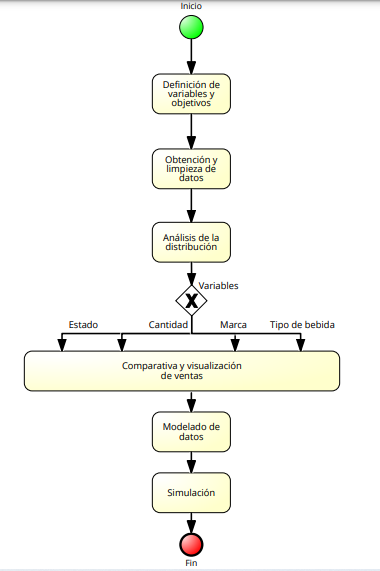

### 1.5 Definición de hipótesis y supuestos.

Supuestos:
- Los datos de las órdenes de compra por producto son independientes, cada cliente solicita sus pedidos de manera separada.
- Como nuestra muestra es muy grande, se tratará de aproximar la distribución de los datos a una distribución normal.

Hipótesis:
- De los tipos de bebida, los wines (vinos) tienen mayor probabilidad de venta que los spirits (otros licores).
- California es el estado con mayor distribución de ventas, por ser el estado más poblado de EE.UU.
- La marca más vendida es Woodbridge by Robert Mondavi porque es la de mayor renombre.

### 1.6 Obtención de bases de datos
> La base de datos la obtuvimos de parte la empresa Constellation Brands Inc, por medio de un archivo de Excel, mismo que se cargará a este cuaderno de Jupyter para su posterior análisis. Se obtuvo este archivo por medio de Ana María, ya que ella actualmente es becaria en Constellation Brands como analista financiero y tiene acceso a dicha información.

### 1.7 Visualización de resultados de simulación.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

In [ ]:
consbrand = pd.read_excel("C:\Sales report.xlsx") #CAMBIAR EL ORIGEN DEL ARCHIVO (DISCO LOCAL C AL DEL REPOSITORIO)
dtypes = consbrand.dtypes
resume = consbrand.describe(exclude=[object]) 

consbrand['Sold-To Party State'].replace(['AR', 'WY', 'UT', 'CT', 'ID', 'GA', 'MT', 'IL', 'CA', 'NY', 'MS',
       'MA', 'FL', 'NJ', 'NC', 'VA', 'HI', 'KS', 'NV', 'TN', 'LA', 'WA',
       'IN', 'ME', 'TX', 'MD', 'AZ', 'RI', 'OH', 'PA', 'SC', 'MN', 'MI',
       'CO', 'NE', 'IA', 'OR', 'NH', 'KY', 'SD', 'MO', 'DE', 'NM', 'AL',
       'VT', 'OK', 'WI', 'ND', 'WV'], np.arange(1,50), inplace=True)

In [2]:
#FUNCIONES AUTOGENERADAS

#Kernel
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='u')
    return(kde.pdf(x_grid))

#Funcion de generacion de la distribucion discreta.
def distri_dis(p_acum, indices, N):
    #p_acum, es la lista de probabildad acumulada.
    #indices, son los valores reales.
    #N, numero de simulaciones
    U =np.random.rand(N)
    val2id = {i:val_i for i, val_i in enumerate(indices)}
    V = pd.Series([sum([1 for i in p_acum if i < ui]) for ui in U]).map(val2id)
    return(V)


def redu_var(p_acum, indices, U):
    #U, cantidad de numeros aleatorias a generar.
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return(y)

def estra_i_espa(B):
    U_estra = (np.random.rand(B) + np.arange(0, B))/B
    return(U_estra)   

## Nodo 1: Estado

### Método de la transformada inversa

In [ ]:
#MÉTODO DE LA TRANFORMADA INVERSA
print('Número de estados: ', consbrand['Sold-To Party State'].nunique())
print(consbrand['Sold-To Party State'].head())
state = consbrand.groupby("Sold-To Party State").count()
state_acum = pd.DataFrame(index = state.index)
freq = state['Sales Order Number'].values

**Histograma de distribución del nodo**

In [ ]:
plt.figure(figsize=(18,10))
plt.bar(state.index, freq, width = .92)
plt.title('Distribucion de probabilidad de ordenes por estado, USA')
plt.ylabel('frequencia')
plt.xlabel('Estados')
plt.show()

**Histograma de distribución acumulada**

In [ ]:
#Cumulative Probability
state_acum['Probability'] = freq/len(consbrand)
state_acum['Cumulative'] = np.cumsum(freq/len(consbrand))
plt.figure(figsize=(18,10))
plt.bar(state.index, state_acum['Cumulative'], width = .92)
plt.title('Distribucion de probabilidad acumulada, USA')
plt.ylabel('frequencia')
plt.xlabel('Estados')
plt.show()

**Generación de una distribución aleatoria**

In [ ]:
#Generación de distribución aleatoria
distri_diss = distri_dis(state_acum['Cumulative'].values, state.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(18,10))
plt.bar(state.index, distri_diss.value_counts(sort = False))
plt.title('Simulacion de funcion de distribución, USA')
plt.ylabel('frequencia')
plt.xlabel('Estados')
plt.show()

### Técnica de reducción de varianza

In [ ]:
#TÉCNICA DE REDUCCION DE VARIANZA
print("TECNICA DE REDUCCION DE VARIANZA")
print("Media distribución discreta: ", 
      round((consbrand['Sold-To Party State']*state_acum['Probability']).sum(),2))

**Media por método Montecarlo**

In [ ]:
#MEDIA POR METODO MONTECARLO
montecacr = distri_diss.mean()
print('Media Montecarlo crudo', round(montecacr,2))

**Media por muestreo estratificado 1**

In [ ]:
#POR MUESTREO ESTRATIFICADO 1
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(state_acum['Cumulative'], 
                                    consbrand['Sold-To Party State'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

**Media por muestreo estratificado 2**

In [ ]:
#POR MUESTREO ESTRATIFICADO 2
m3 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

**Media por números complementarios**

In [ ]:
#POR NÚMEROS COMPLEMENTARIOS
m4 = redu_var(state_acum['Cumulative'], 
              consbrand['Sold-To Party State'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media numeros complementario: ', round(np.mean(m4), 2))

### Prueba de Bondad y Ajuste

In [ ]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("PRUEBA DE BONDAD Y AJUSTE")
print("Media (MonteCarlo): ", round(consbrand['Sold-To Party State'].mean(), 2))
print("Desviacón estandar: ", round(consbrand['Sold-To Party State'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Sold-To Party State']),2), "vs", 
      round(np.std(consbrand['Sold-To Party State'])/np.sqrt(len(consbrand['Sold-To Party State'])),2))
#Podemos calcular la varianza ya que estas son variables independientes.

**Intervalo de confianza**

In [ ]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Sold-To Party State'].mean(), 
                     consbrand['Sold-To Party State'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

**Prueba de Hipótesis Nula**

In [ ]:
#HIPÓTESIS NULA
H0 = st.ttest_1samp(X, montecacr)
print('Prueba de hipotesis: ', H0)

#ESTADÍSTICO NORMALIZADO
t = (np.mean(X) - montecacr)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

'''
El valor de PValue es un valor significativamente mayor al indice de confianza
previamente definido, por lo tanto NO rechazamos la media calculada en la simulación,
sin embargo, el estadistico esta fuera de la región de aceptación.

### Kernel Density Estimation (KDE)

In [ ]:
#KERNEL DENSITY ESTIMATION
kernel = kde_statsmodels_m(consbrand['Sold-To Party State'], state.index, bandwidth=0.2)
plt.bar(state.index ,state_acum['Probability'])
plt.plot(state.index, kernel)
plt.show()

### Trama Q-Q

## Nodo 2: Cantidad del pedido

(Cantidad de cajas de botellas por producto)

### Métoodo de la Transformada inversa

In [ ]:
botellas = consbrand.groupby("Order Quantity").count()

#METODO DE LA TRANFORMADA INVERSA
print(consbrand['Order Quantity'].head())
botellas_acum = pd.DataFrame(index = botellas.index)
freqb = botellas['Sales Order Number'].values

**Histograma de distribución del nodo**

In [ ]:
plt.figure(figsize=(18,10))
plt.bar(botellas.index, np.log(freqb), width = .92)
plt.title('Distribucion de probabilidad de ordenes por estado, USA')
plt.ylabel('frequencia')
plt.xlabel('Botellas')
plt.show()

**Histograma de distribución acumulado**

In [ ]:
botellas_acum['Probability'] = freqb/len(consbrand)
botellas_acum['Cumulative'] = np.cumsum(freqb/len(consbrand))
#Cumulative
plt.figure(figsize=(18,10))
plt.bar(botellas.index, botellas_acum['Cumulative'], width = .92)
plt.title('Distribucion de probabilidad acumulada, USA')
plt.ylabel('frequencia')
plt.xlabel('Botellas')
plt.show()

**Generación de una distribución aleatoria**

In [ ]:
distri_dissb = distri_dis(botellas_acum['Cumulative'].values, botellas.index, 200000) #ES IGUAL A M1
plt.figure(figsize=(18,10))
plt.bar(botellas.index[0:len(distri_dissb.value_counts(sort = False))], np.log(distri_dissb.value_counts(sort = False)))
plt.title('Simulacion de funcion de distribución, USA')
plt.ylabel('frequencia')
plt.xlabel('Botellas')
plt.show()

### Técnica de Reducción de Varianza

In [ ]:
#TECNICA DE REDUCCION DE VARIANZA
print("TECNICA DE REDUCCION DE VARIANZA")
print("Media distribución discreta: ", 
      round((consbrand['Order Quantity']*botellas_acum['Probability']).sum(),2))

**Media por Montecarlo**

In [ ]:
#MEDIA POR METODO MONTECARLO
montecacrb = distri_dissb.mean()
print('Media Montecarlo crudo', round(montecacrb,2))

**Media por muestreo estratificado 1**

In [ ]:
#MUESTREO ESTRATIFICADO
e = [np.random.uniform(0, 0.3, int(0.3 * 1000)),
     np.random.uniform(0.3, 0.7, int(0.4 * 1000)),
     np.random.uniform(0.7, 1, int(0.3 * 1000))]
w = [(len(consbrand)*.30/len(consbrand))/.3,
     (len(consbrand)*.30/len(consbrand))/.4 ,
     (len(consbrand)*.30/len(consbrand))/.3] 
m2= list(map(lambda ui,wi: redu_var(botellas_acum['Cumulative'], 
                                    consbrand['Order Quantity'], 
                                    ui)/wi, e, w))
print('Media muestreo estratificado(1):', round(np.concatenate(m2).mean(),2))

**Media por muestreo estratificado 2**

In [ ]:
m3 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'], 
              estra_i_espa(10000))

print('Media muestreo estratificado(2): ', round(np.mean(m3), 2))

**Media por números complementarios**

In [ ]:
#NÚMEROS COMPLEMENTARIOS
m4 = redu_var(botellas_acum['Cumulative'], 
              consbrand['Order Quantity'],  
              np.concatenate([np.random.rand(10000), 1 - np.random.rand(10000)]))
print('Media numeros complementario: ', round(np.mean(m4), 2))

### Prueba de Bondad y Ajuste

In [ ]:
#PRUEBA DE BONDAD Y AJUSTE
#(Datos reales)
print("PRUEBA DE BONDAD Y AJUSTE")
print("Media (MonteCarlo): ", round(consbrand['Order Quantity'].mean(), 2))
print("Desviacón estandar: ", round(consbrand['Order Quantity'].std(), 2))
print("Varianza: ", round(st.sem(consbrand['Order Quantity']),6), "vs", 
      round(np.std(consbrand['Order Quantity'])/np.sqrt(len(consbrand['Order Quantity'])),6))
#Podemos calcular la varianza ya que estas son variables independientes.

**Intervalo de confianza**

In [ ]:
#Intervalo de confianza 
np.random.seed(5555)
X = np.random.normal(consbrand['Order Quantity'].mean(), 
                     consbrand['Order Quantity'].std(),
                     100000)
confianza = 0.05

#Intervalo de confianza usando t-student
intervalo1 = st.t.interval(.90, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo2 = st.t.interval(.95, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))
intervalo3 = st.t.interval(.99, 
                       len(X)-1, 
                       loc=np.mean(X), 
                       scale=st.sem(X))

print("Intervalo al 90% de confianza: ", intervalo1)
print("Intervalo al 95% de confianza: ", intervalo2)
print("Intervalo al 99% de confianza: ", intervalo3)

**Prueba de Hipótesis Nula**

In [ ]:
#HIPOTESIS NULA
H0 = st.ttest_1samp(X, montecacrb)
print('Prueba de hipotesis: ', H0)

#ESTADISTICO NORMALIZADO
t = (np.mean(X) - montecacrb)/(np.std(X)/np.sqrt(100000))
print('Estadístico de prueba teórico: ', round(t, 5))
cuantil = st.t(100000 - 1).cdf(1 - confianza/2)
print(f'Región de rechazo: (t < {-round(cuantil,4)}) U (t > {round(cuantil,4)})')

### Kernel Density Estimation (KDE)

### Tramas Q-Q

## Nodo 3:

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo